Convolutional Dictionary Learning
=================================

This example demonstrates the use of [parcnsdl.ConvBPDNDictLearn_Consensus](http://sporco.rtfd.org/en/latest/sporco.admm.parcnsdl.html#sporco.admm.parcnsdl.ConvBPDNDictLearn_Consensus) for learning a convolutional dictionary from a set of colour training images [[29]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-convolutional). The dictionary learning algorithm is based on the ADMM consensus dictionary update [[40]](http://sporco.rtfd.org/en/latest/zreferences.html#sorel-2016-fast) [[14]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2017-convolutional).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.admm import parcnsdl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S3 = exim.image('monarch.png', idxexp=np.s_[:, 160:672])
S4 = exim.image('sail.png', idxexp=np.s_[:, 210:722])
S5 = exim.image('tulips.png', idxexp=np.s_[:, 30:542])
S = np.stack((S1, S2, S3, S4, S5), axis=3)

Highpass filter training images.

In [3]:
npd = 16
fltlmbd = 5
sl, sh = util.tikhonov_filter(S, fltlmbd, npd)

Construct initial dictionary.

In [4]:
np.random.seed(12345)
D0 = np.random.randn(8, 8, 3, 64)

Set regularization parameter and options for dictionary learning solver.

In [5]:
lmbda = 0.2
opt = parcnsdl.ConvBPDNDictLearn_Consensus.Options({'Verbose': True,
                        'MaxMainIter': 200,
                        'CBPDN': {'rho': 50.0*lmbda + 0.5},
                        'CCMOD': {'rho': 1.0, 'ZeroMean': True}})

Create solver object and solve.

In [6]:
d = parcnsdl.ConvBPDNDictLearn_Consensus(D0, sh, lmbda, opt)
D1 = d.solve()
print("ConvBPDNDictLearn_Consensus solve time: %.2fs" %
      d.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     
----------------------------------


   0  1.41e+03  1.41e+03  4.47e+00


   1  1.32e+03  1.28e+03  1.86e+02


   2  1.09e+03  9.44e+02  7.46e+02


   3  9.37e+02  6.61e+02  1.38e+03


   4  8.71e+02  4.99e+02  1.86e+03


   5  8.39e+02  4.08e+02  2.16e+03


   6  8.14e+02  3.52e+02  2.31e+03


   7  7.91e+02  3.17e+02  2.37e+03


   8  7.71e+02  2.95e+02  2.38e+03


   9  7.55e+02  2.81e+02  2.37e+03


  10  7.42e+02  2.72e+02  2.35e+03


  11  7.31e+02  2.66e+02  2.33e+03


  12  7.23e+02  2.62e+02  2.30e+03


  13  7.16e+02  2.59e+02  2.28e+03


  14  7.10e+02  2.56e+02  2.27e+03


  15  7.04e+02  2.53e+02  2.26e+03


  16  7.00e+02  2.51e+02  2.25e+03


  17  6.96e+02  2.48e+02  2.24e+03


  18  6.92e+02  2.46e+02  2.23e+03


  19  6.89e+02  2.44e+02  2.23e+03


  20  6.86e+02  2.42e+02  2.22e+03


  21  6.83e+02  2.40e+02  2.22e+03


  22  6.81e+02  2.39e+02  2.21e+03


  23  6.78e+02  2.37e+02  2.21e+03


  24  6.76e+02  2.36e+02  2.20e+03


  25  6.74e+02  2.35e+02  2.20e+03


  26  6.72e+02  2.34e+02  2.19e+03


  27  6.71e+02  2.33e+02  2.19e+03


  28  6.69e+02  2.32e+02  2.18e+03


  29  6.67e+02  2.31e+02  2.18e+03


  30  6.66e+02  2.31e+02  2.18e+03


  31  6.64e+02  2.30e+02  2.17e+03


  32  6.63e+02  2.29e+02  2.17e+03


  33  6.62e+02  2.29e+02  2.17e+03


  34  6.61e+02  2.28e+02  2.16e+03


  35  6.60e+02  2.27e+02  2.16e+03


  36  6.58e+02  2.27e+02  2.16e+03


  37  6.57e+02  2.26e+02  2.15e+03


  38  6.56e+02  2.26e+02  2.15e+03


  39  6.55e+02  2.26e+02  2.15e+03


  40  6.55e+02  2.25e+02  2.15e+03


  41  6.54e+02  2.25e+02  2.14e+03


  42  6.53e+02  2.24e+02  2.14e+03


  43  6.52e+02  2.24e+02  2.14e+03


  44  6.51e+02  2.24e+02  2.14e+03


  45  6.50e+02  2.23e+02  2.14e+03


  46  6.50e+02  2.23e+02  2.13e+03


  47  6.49e+02  2.23e+02  2.13e+03


  48  6.48e+02  2.22e+02  2.13e+03


  49  6.48e+02  2.22e+02  2.13e+03


  50  6.47e+02  2.22e+02  2.13e+03


  51  6.46e+02  2.21e+02  2.12e+03


  52  6.46e+02  2.21e+02  2.12e+03


  53  6.45e+02  2.21e+02  2.12e+03


  54  6.45e+02  2.21e+02  2.12e+03


  55  6.44e+02  2.20e+02  2.12e+03


  56  6.43e+02  2.20e+02  2.12e+03


  57  6.43e+02  2.20e+02  2.11e+03


  58  6.42e+02  2.20e+02  2.11e+03


  59  6.42e+02  2.19e+02  2.11e+03


  60  6.41e+02  2.19e+02  2.11e+03


  61  6.41e+02  2.19e+02  2.11e+03


  62  6.40e+02  2.19e+02  2.11e+03


  63  6.40e+02  2.19e+02  2.11e+03


  64  6.40e+02  2.19e+02  2.11e+03


  65  6.39e+02  2.18e+02  2.10e+03


  66  6.39e+02  2.18e+02  2.10e+03


  67  6.38e+02  2.18e+02  2.10e+03


  68  6.38e+02  2.18e+02  2.10e+03


  69  6.37e+02  2.18e+02  2.10e+03


  70  6.37e+02  2.18e+02  2.10e+03


  71  6.37e+02  2.17e+02  2.10e+03


  72  6.36e+02  2.17e+02  2.10e+03


  73  6.36e+02  2.17e+02  2.09e+03


  74  6.36e+02  2.17e+02  2.09e+03


  75  6.35e+02  2.17e+02  2.09e+03


  76  6.35e+02  2.17e+02  2.09e+03


  77  6.35e+02  2.17e+02  2.09e+03


  78  6.34e+02  2.16e+02  2.09e+03


  79  6.34e+02  2.16e+02  2.09e+03


  80  6.34e+02  2.16e+02  2.09e+03


  81  6.33e+02  2.16e+02  2.09e+03


  82  6.33e+02  2.16e+02  2.09e+03


  83  6.33e+02  2.16e+02  2.08e+03


  84  6.32e+02  2.16e+02  2.08e+03


  85  6.32e+02  2.16e+02  2.08e+03


  86  6.32e+02  2.15e+02  2.08e+03


  87  6.32e+02  2.15e+02  2.08e+03


  88  6.31e+02  2.15e+02  2.08e+03


  89  6.31e+02  2.15e+02  2.08e+03


  90  6.31e+02  2.15e+02  2.08e+03


  91  6.31e+02  2.15e+02  2.08e+03


  92  6.30e+02  2.15e+02  2.08e+03


  93  6.30e+02  2.15e+02  2.08e+03


  94  6.30e+02  2.15e+02  2.08e+03


  95  6.30e+02  2.15e+02  2.08e+03


  96  6.29e+02  2.14e+02  2.07e+03


  97  6.29e+02  2.14e+02  2.07e+03


  98  6.29e+02  2.14e+02  2.07e+03


  99  6.29e+02  2.14e+02  2.07e+03


 100  6.28e+02  2.14e+02  2.07e+03


 101  6.28e+02  2.14e+02  2.07e+03


 102  6.28e+02  2.14e+02  2.07e+03


 103  6.28e+02  2.14e+02  2.07e+03


 104  6.28e+02  2.14e+02  2.07e+03


 105  6.27e+02  2.14e+02  2.07e+03


 106  6.27e+02  2.14e+02  2.07e+03


 107  6.27e+02  2.14e+02  2.07e+03


 108  6.27e+02  2.14e+02  2.07e+03


 109  6.27e+02  2.14e+02  2.07e+03


 110  6.26e+02  2.13e+02  2.07e+03


 111  6.26e+02  2.13e+02  2.06e+03


 112  6.26e+02  2.13e+02  2.06e+03


 113  6.26e+02  2.13e+02  2.06e+03


 114  6.26e+02  2.13e+02  2.06e+03


 115  6.26e+02  2.13e+02  2.06e+03


 116  6.25e+02  2.13e+02  2.06e+03


 117  6.25e+02  2.13e+02  2.06e+03


 118  6.25e+02  2.13e+02  2.06e+03


 119  6.25e+02  2.13e+02  2.06e+03


 120  6.25e+02  2.13e+02  2.06e+03


 121  6.25e+02  2.13e+02  2.06e+03


 122  6.24e+02  2.13e+02  2.06e+03


 123  6.24e+02  2.13e+02  2.06e+03


 124  6.24e+02  2.13e+02  2.06e+03


 125  6.24e+02  2.12e+02  2.06e+03


 126  6.24e+02  2.12e+02  2.06e+03


 127  6.24e+02  2.12e+02  2.06e+03


 128  6.23e+02  2.12e+02  2.06e+03


 129  6.23e+02  2.12e+02  2.06e+03


 130  6.23e+02  2.12e+02  2.05e+03


 131  6.23e+02  2.12e+02  2.05e+03


 132  6.23e+02  2.12e+02  2.05e+03


 133  6.23e+02  2.12e+02  2.05e+03


 134  6.23e+02  2.12e+02  2.05e+03


 135  6.23e+02  2.12e+02  2.05e+03


 136  6.22e+02  2.12e+02  2.05e+03


 137  6.22e+02  2.12e+02  2.05e+03


 138  6.22e+02  2.12e+02  2.05e+03


 139  6.22e+02  2.12e+02  2.05e+03


 140  6.22e+02  2.12e+02  2.05e+03


 141  6.22e+02  2.12e+02  2.05e+03


 142  6.22e+02  2.12e+02  2.05e+03


 143  6.22e+02  2.12e+02  2.05e+03


 144  6.21e+02  2.12e+02  2.05e+03


 145  6.21e+02  2.12e+02  2.05e+03


 146  6.21e+02  2.12e+02  2.05e+03


 147  6.21e+02  2.11e+02  2.05e+03


 148  6.21e+02  2.11e+02  2.05e+03


 149  6.21e+02  2.11e+02  2.05e+03


 150  6.21e+02  2.11e+02  2.05e+03


 151  6.21e+02  2.11e+02  2.05e+03


 152  6.21e+02  2.11e+02  2.05e+03


 153  6.20e+02  2.11e+02  2.05e+03


 154  6.20e+02  2.11e+02  2.05e+03


 155  6.20e+02  2.11e+02  2.04e+03


 156  6.20e+02  2.11e+02  2.04e+03


 157  6.20e+02  2.11e+02  2.04e+03


 158  6.20e+02  2.11e+02  2.04e+03


 159  6.20e+02  2.11e+02  2.04e+03


 160  6.20e+02  2.11e+02  2.04e+03


 161  6.20e+02  2.11e+02  2.04e+03


 162  6.19e+02  2.11e+02  2.04e+03


 163  6.19e+02  2.11e+02  2.04e+03


 164  6.19e+02  2.11e+02  2.04e+03


 165  6.19e+02  2.11e+02  2.04e+03


 166  6.19e+02  2.11e+02  2.04e+03


 167  6.19e+02  2.11e+02  2.04e+03


 168  6.19e+02  2.11e+02  2.04e+03


 169  6.19e+02  2.11e+02  2.04e+03


 170  6.19e+02  2.11e+02  2.04e+03


 171  6.19e+02  2.11e+02  2.04e+03


 172  6.19e+02  2.11e+02  2.04e+03


 173  6.18e+02  2.11e+02  2.04e+03


 174  6.18e+02  2.11e+02  2.04e+03


 175  6.18e+02  2.11e+02  2.04e+03


 176  6.18e+02  2.11e+02  2.04e+03


 177  6.18e+02  2.11e+02  2.04e+03


 178  6.18e+02  2.11e+02  2.04e+03


 179  6.18e+02  2.11e+02  2.04e+03


 180  6.18e+02  2.11e+02  2.04e+03


 181  6.18e+02  2.11e+02  2.04e+03


 182  6.18e+02  2.11e+02  2.04e+03


 183  6.18e+02  2.11e+02  2.04e+03


 184  6.18e+02  2.11e+02  2.04e+03


 185  6.17e+02  2.11e+02  2.03e+03


 186  6.17e+02  2.10e+02  2.03e+03


 187  6.17e+02  2.10e+02  2.03e+03


 188  6.17e+02  2.10e+02  2.03e+03


 189  6.17e+02  2.10e+02  2.03e+03


 190  6.17e+02  2.10e+02  2.03e+03


 191  6.17e+02  2.10e+02  2.03e+03


 192  6.17e+02  2.10e+02  2.03e+03


 193  6.17e+02  2.10e+02  2.03e+03


 194  6.17e+02  2.10e+02  2.03e+03


 195  6.17e+02  2.10e+02  2.03e+03


 196  6.17e+02  2.10e+02  2.03e+03


 197  6.17e+02  2.10e+02  2.03e+03


 198  6.17e+02  2.10e+02  2.03e+03


 199  6.16e+02  2.10e+02  2.03e+03
----------------------------------
ConvBPDNDictLearn_Consensus solve time: 135.00s


Display initial and final dictionaries.

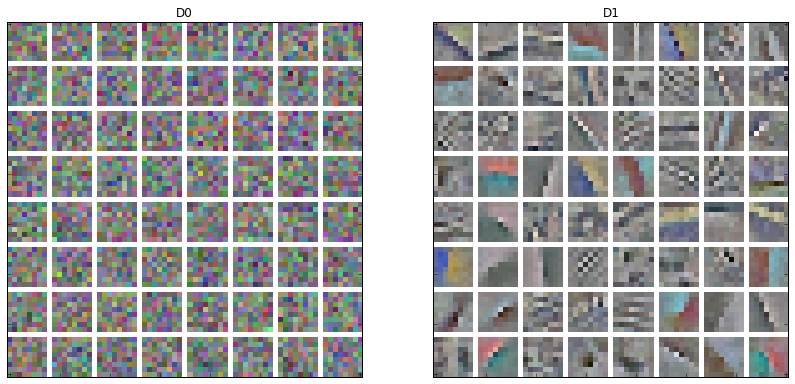

In [7]:
D1 = D1.squeeze()
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D0), fgrf=fig, title='D0')
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D1), fgrf=fig, title='D1')
fig.show()

Get iterations statistics from solver object and plot functional value

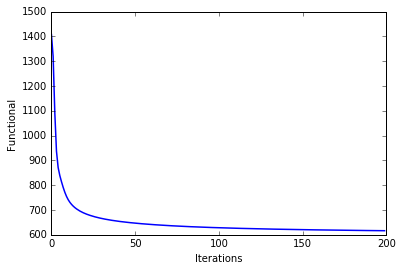

In [8]:
its = d.getitstat()
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional')